In [1]:
import pandas as pd
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
user_df = pd.read_csv('downloads/user.csv')
user_df.drop_duplicates(inplace=True)

In [3]:
movie_df = pd.read_csv('downloads/item.csv')
movie_df.drop_duplicates(inplace=True)

In [4]:
rating_df = pd.read_csv('downloads/Data.csv')
rating_df.drop_duplicates(inplace=True)

In [6]:
user_df.head(8)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


In [7]:
movie_df.head(8)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rating_df.head(8)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467


In [9]:
print(user_df.loc[:10,:])

print('\n> .info()')
print(user_df.info())
print('> user_df has no missing values in any column')

print('\n> .shape')
print('> user_df ('+str(user_df.shape[0]) + ' rows and '+str(user_df.shape[1])+' columns)\n')

print('\n> .describe()')
categorical = user_df.dtypes[user_df.dtypes == "object"].index

print(user_df.describe())
print(user_df[categorical].describe())

    user id  age gender     occupation zip code
0         1   24      M     technician    85711
1         2   53      F          other    94043
2         3   23      M         writer    32067
3         4   24      M     technician    43537
4         5   33      F          other    15213
5         6   42      M      executive    98101
6         7   57      M  administrator    91344
7         8   36      M  administrator    05201
8         9   29      M        student    01002
9        10   53      M         lawyer    90703
10       11   39      F          other    30329

> .info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 84.2+ KB
None
> user_df has no missing values in any column

> .shape
> user_df (943 rows and 5 col

In [10]:
print(movie_df.loc[:10,:])

print('\n> .info()')
print(movie_df.info())
print('> movie_df has no missing values in any column')

print('\n> .shape')
print('> movie_df ('+str(movie_df.shape[0]) + ' rows and '+str(movie_df.shape[1])+' columns)\n')

print('\n> .describe()')
categorical = movie_df.dtypes[movie_df.dtypes == "object"].index

print(movie_df.describe())
print(movie_df[categorical].describe())

    movie id                                     movie title release date  \
0          1                                      Toy Story   01-Jan-1995   
1          2                                      GoldenEye   01-Jan-1995   
2          3                                     Four Rooms   01-Jan-1995   
3          4                                     Get Shorty   01-Jan-1995   
4          5                                        Copycat   01-Jan-1995   
5          6  Shanghai Triad (Yao a yao yao dao waipo qiao)   01-Jan-1995   
6          7                                 Twelve Monkeys   01-Jan-1995   
7          8                                           Babe   01-Jan-1995   
8          9                               Dead Man Walking   01-Jan-1995   
9         10                                    Richard III   22-Jan-1996   
10        11                                  Seven (Se7en)   01-Jan-1995   

    unknown  Action  Adventure  Animation  Childrens  Comedy  Crime  ...  \

In [11]:
print(rating_df.loc[:10,:])

print('\n> .info()')
print(rating_df.info())
print('> rating_df has no missing values in any column')

print('\n> .shape')
print('> rating_df ('+str(rating_df.shape[0]) + ' rows and '+str(movie_df.shape[1])+' columns)\n')

print('\n> .describe()')
print(rating_df.describe())


    user id  movie id  rating  timestamp
0       196       242       3  881250949
1       186       302       3  891717742
2        22       377       1  878887116
3       244        51       2  880606923
4       166       346       1  886397596
5       298       474       4  884182806
6       115       265       2  881171488
7       253       465       5  891628467
8       305       451       3  886324817
9         6        86       3  883603013
10       62       257       2  879372434

> .info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 6.3 MB
None
> rating_df has no missing values in any column

> .shape
> rating_df (100000 rows and 22 columns)


> .describe()
            user id       movie id         rating     timestamp
count  100000.00000  10000

In [12]:
# use sum on the default axis
movie_per_genre = pd.DataFrame(data={
    "genre":movie_df[[e for e in movie_df.columns if e not in ['movie id', 'movie title', 'release date']]].sum().index,
    "count":movie_df[[e for e in movie_df.columns if e not in ['movie id', 'movie title', 'release date']]].sum().values
})
movie_per_genre.sort_values('count', ascending=False)

,genre,count
8,Drama,725
5,Comedy,505
1,Action,251
16,Thriller,251
14,Romance,247
2,Adventure,135
4,Childrens,122
6,Crime,109
15,Sci-Fi,101
11,Horror,92


In [14]:
#hint: use sum on the axis = 1
movie_df.loc[movie_df[[e for e in movie_df.columns if e not in ['movie id', 'movie title', 'release date']]].sum(axis=1) > 1,'movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

In [15]:
# checking if movies with unknown gender exclusive to other genera
print(movie_df.loc[movie_df['unknown'] == 1, [e for e in movie_df.columns if e not in ['movie id', 'movie title', 'release date']]].sum(axis=1))

# removing it
movie_df = movie_df[movie_df['unknown'] != 1]

1371    1
dtype: int64


In [16]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [21]:
#your answers here
# rating
fig = px.histogram(rating_df, x='rating', marginal='box', title="Rating Value Distribution")
fig.show()

# age
fig = px.histogram(user_df, x='age', marginal='box', title="User Age Distribution")
fig.show()

# release year
movie_df['release_year'] = [re.search('\d{4}', e).group(0) for e in movie_df['release date']]
fig = px.histogram(movie_df, x='release_year', marginal='box', title="Release Year Distribution")
fig.show()

# gender
fig = px.histogram(user_df, x='gender', title="User Gender Distribution")
fig.show()

# occupation
occupation_count = pd.DataFrame(data={
    'occupation':user_df['occupation'].value_counts().index,
    'count':user_df['occupation'].value_counts().values
})
occupation_count = occupation_count.sort_values('count', ascending=True)
fig = px.bar(occupation_count, x='count', y='occupation', title="User Occupation Distribution", orientation='h')
fig.show()

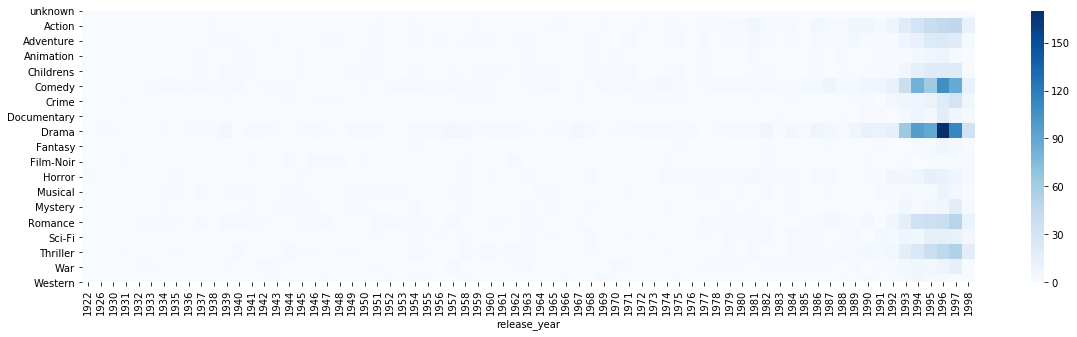

In [19]:
# using seaborn
genera_popularity_df = movie_df[[e for e in movie_df.columns if e not in ['movie id', 'movie title', 'release date']]].groupby('release_year').sum()
plt.figure(figsize=(20,5))
sns.heatmap(genera_popularity_df.transpose(),cmap="Blues")

In [20]:
# using plotly
genera_popularity_plotly_df = genera_popularity_df
genera_popularity_plotly_df['release year'] = genera_popularity_plotly_df.index
genera_popularity_plotly_df.index = range(len(genera_popularity_plotly_df))
genera_popularity_plotly_df = genera_popularity_df.melt(id_vars = 'release year',
                          value_vars=[e for e in genera_popularity_plotly_df.columns.values if e != 'release year'],
                          var_name='genre')

fig = px.scatter(genera_popularity_plotly_df,
                 x="release year", y="genre", size="value", title="Popularity by Year")
fig.show()

In [5]:
# build list of movies with more than 100 reviews
foo = movie_df.join(rating_df.set_index('movie id'), on='movie id')[['movie id', 'movie title', 'rating']]
movies_with_at_least_100_reviews = pd.DataFrame(data={
    'title':foo['movie title'].value_counts().index,
    'count':foo['movie title'].value_counts().values
})
movies_with_at_least_100_reviews = movies_with_at_least_100_reviews[movies_with_at_least_100_reviews['count'] > 100]
movies_with_at_least_100_reviews = movies_with_at_least_100_reviews['title']

# build df of avg ratings and filtering only movies with more than 100 ratings
avg_rating =  foo.groupby(['movie id', 'movie title']).mean()
avg_rating = pd.DataFrame(data={
    'movie_id':[e[0] for e in avg_rating.index],
    'movie_title':[e[1] for e in avg_rating.index],
    'avg_rating':[e[0] for e in avg_rating.values]
})
avg_rating = avg_rating[avg_rating['movie_title'].isin(movies_with_at_least_100_reviews)]
avg_rating = avg_rating.sort_values('avg_rating', ascending=False)
avg_rating

,movie_id,movie_title,avg_rating
406,408,"Close Shave, A",4.491071
316,318,Schindler's List,4.466443
168,169,"Wrong Trousers, The",4.466102
481,483,Casablanca,4.456790
63,64,"Shawshank Redemption, The",4.445230
...,...,...,...
356,358,Spawn,2.615385
259,260,Event Horizon,2.574803
323,325,Crash,2.546875
242,243,Jungle2Jungle,2.439394


In [6]:
# join user in ratings
foo = user_df[['user id', 'gender']].join(rating_df[['user id', 'movie id']].set_index('user id'), on='user id', how='inner')
# join user_ratings in movies
foo = foo.join(movie_df.set_index('movie id'), on='movie id', how='inner')

# with a user_movies df in hands, filter gender, drama sci-fi and romance
foo = foo[['gender', 'Drama', "Sci-Fi", 'Romance']]
print(foo.head())
# divide a 
foo = foo.groupby('gender').sum()/foo.groupby('gender').sum().sum()
foo

   gender  Drama  Sci-Fi  Romance
0       M      1       0        0
12      M      1       0        0
17      F      1       0        0
57      M      1       0        0
58      M      1       0        0


,Drama,Sci-Fi,Romance
gender,,,
F,0.275924,0.20652,0.301012
M,0.724076,0.79348,0.698988


In [7]:
# Men watch more drama than women: yes.   men: .72 woman: .28
# Women watch more Sci-Fi than men: no.   men: .79 woman: .21
# Men watch more Romance than women: yes. men: .70 woman: .30

Conclusion
The data was well structured and clean, I have had no issue dealing with that. I checked for missing values using describe and .value_counts() of each column, but seems everthing was there, there was no need to use .fillna(). Checking the distribution of numeric variables was also not problematic, using release year made it easier than using pandas datetime type.
For general popularity I used seaborn heatmap, but find out I can read it better in plotly scatter blot. Beside that I used joins instead of merge.